Keval Shah

60009220055

IPCV Exp6

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

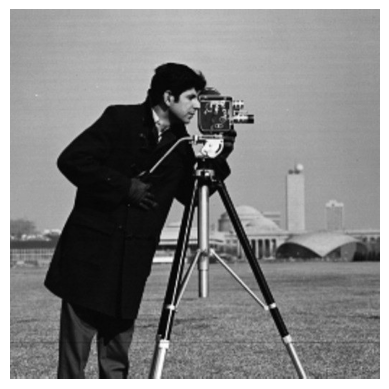

In [3]:
image = cv2.imread('/content/cameraman.jpg')
plt.imshow(image)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
gray_image.shape

(512, 512)

In [14]:
def apply_convolution(image, kernel):
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float32)

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            region = padded_image[x:x+kernel_size, y:y+kernel_size]
            output[x, y] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)

In [11]:
def high_pass_filter(image, A, size=3):
    kernel = np.array([
        [-1, -1, -1],
        [-1, (9 * A - 1), -1],
        [-1, -1, -1]
    ], dtype=np.float32)

    kernel /= np.sum(np.abs(kernel))

    low_pass_kernel = np.ones((size, size), np.float32) / (size**2)
    low_pass_image = apply_convolution(image, low_pass_kernel)

    high_pass_image = image - low_pass_image
    return np.clip(high_pass_image, 0, 255).astype(np.uint8)

In [13]:
def high_boost_filter(image, A, size=3):
    high_pass_image = high_pass_filter(image, A, size)
    high_boost_image = (A - 1) * image + high_pass_image
    return np.clip(high_boost_image, 0, 255).astype(np.uint8)

In [7]:
def plot_images(original, filtered, title_filtered):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title_filtered)
    plt.axis('off')

    plt.show()

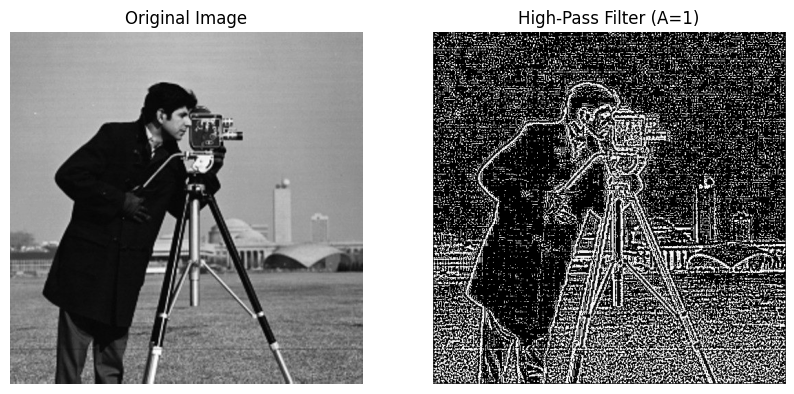

In [15]:
high_pass = high_pass_filter(gray_image, A=1, size=3)
plot_images(gray_image, high_pass, "High-Pass Filter (A=1)")

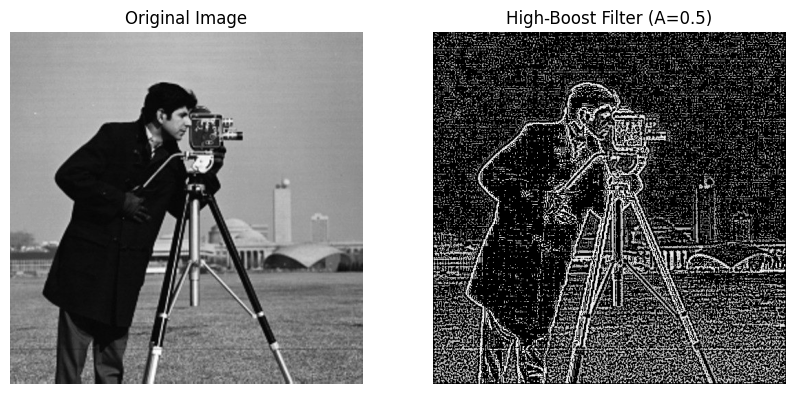

In [17]:
high_boost_1 = high_boost_filter(gray_image, A=0.5, size=3)
plot_images(gray_image, high_boost_1, "High-Boost Filter (A=0.5)")

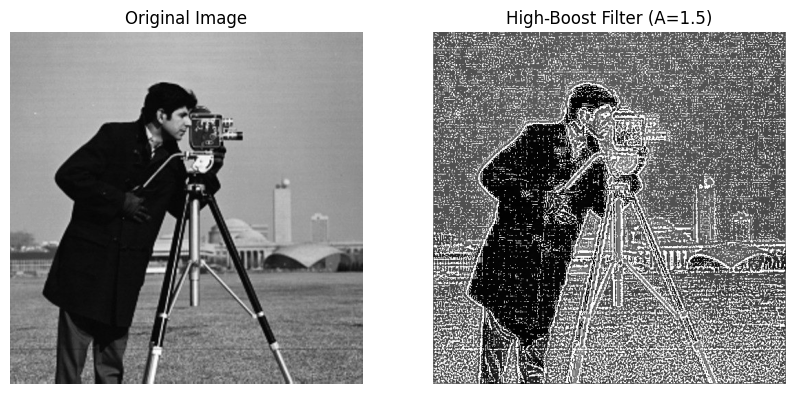

In [18]:
high_boost_2 = high_boost_filter(gray_image, A=1.5, size=3)
plot_images(gray_image, high_boost_2, "High-Boost Filter (A=1.5)")

###Covid Image

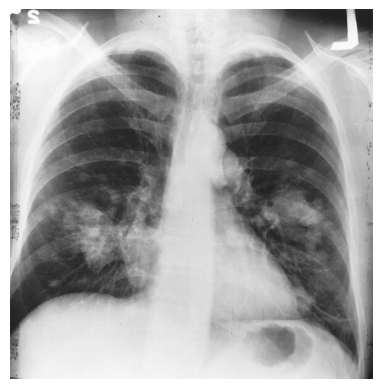

In [21]:
image = cv2.imread('/content/covid_xray_image.jpeg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
covid = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(covid)
plt.axis('off')
plt.show()

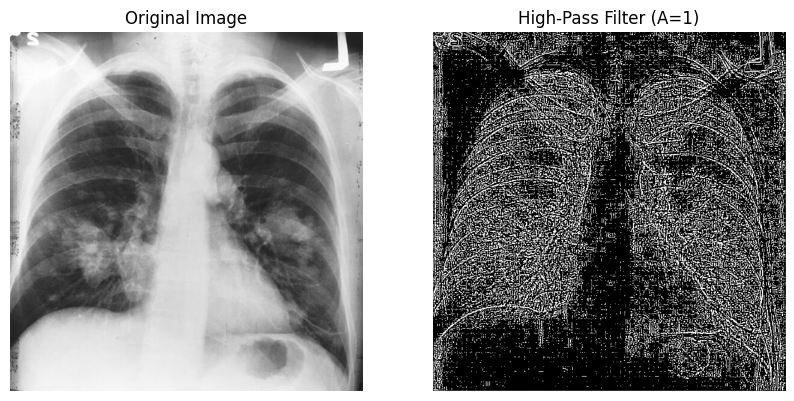

In [22]:
high_pass = high_pass_filter(gray_image, A=1, size=3)
plot_images(covid, high_pass, "High-Pass Filter (A=1)")

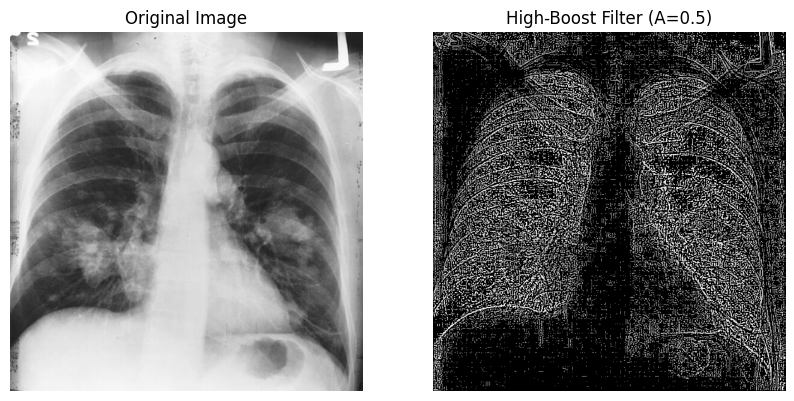

In [23]:
high_boost_1 = high_boost_filter(gray_image, A=0.5, size=3)
plot_images(covid, high_boost_1, "High-Boost Filter (A=0.5)")

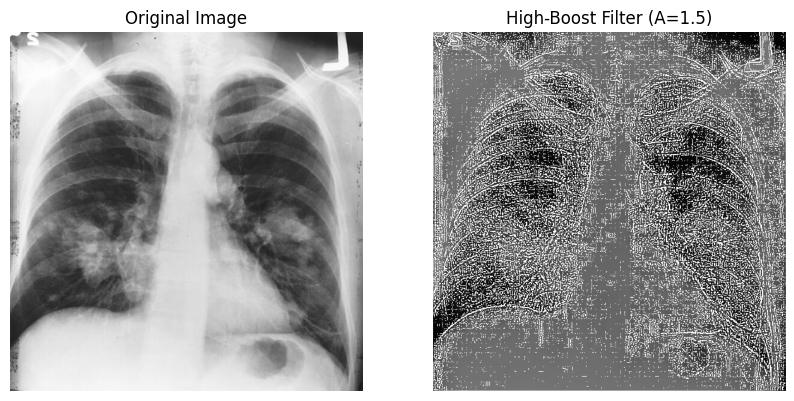

In [24]:
high_boost_2 = high_boost_filter(gray_image, A=1.5, size=3)
plot_images(covid, high_boost_2, "High-Boost Filter (A=1.5)")


## Observations :

* A=0.5 provides a mild edge enhancement, preserving more of the original image's smoothness.



* A=1 strikes a balance by effectively enhancing the edges without overdoing the contrast.



* A=1.5 results in a highly sharpened image with noticeable edge enhancement.

###Coloured Image

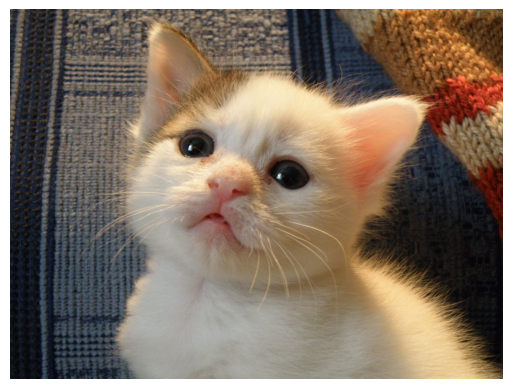

In [25]:
image = cv2.imread('/content/test_cat1.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

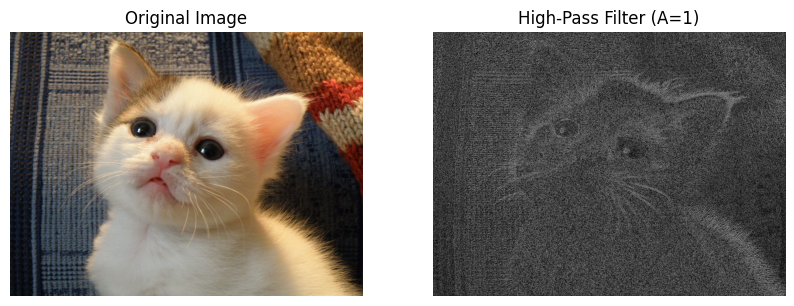

In [27]:
high_pass = high_pass_filter(gray_image, A=1, size=3)
plot_images(img, high_pass, "High-Pass Filter (A=1)")

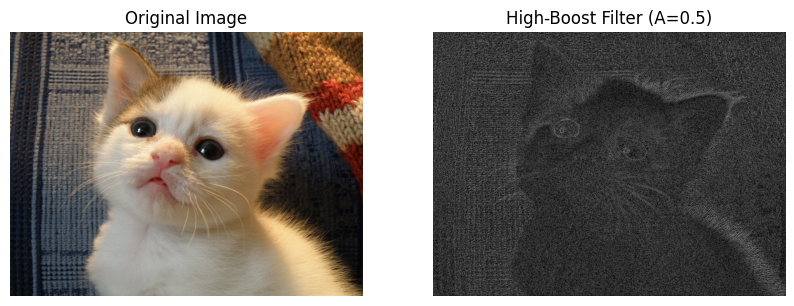

In [30]:
high_boost_1 = high_boost_filter(gray_image, A=0.5, size=3)
plot_images(img, high_boost_1, "High-Boost Filter (A=0.5)")

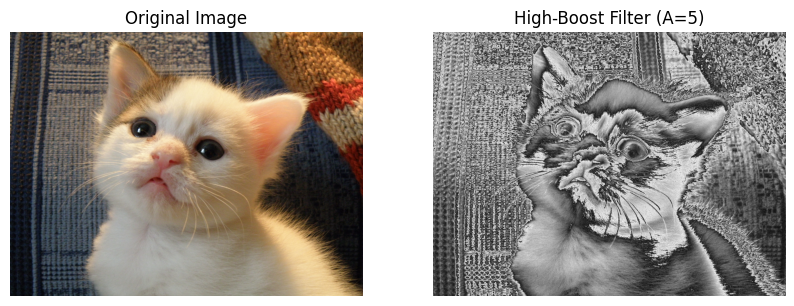

In [31]:
high_boost_2 = high_boost_filter(gray_image, A=5, size=3)
plot_images(img, high_boost_2, "High-Boost Filter (A=5)")

## Conclusion

In this experiment, we explored the effects of a high-pass filter on an image using different amplification factors (A). We observed that adjusting the value of \( A \) significantly changes the way edges and fine details are highlighted in the image. When \( A = 1 \), we achieved a balanced edge enhancement without overly sharpening the image.

## Key Observations
- **For \( A = 1 \)**: Standard high-pass filtering enhanced the edges effectively without over-sharpening.
- **For \( A < 1 \)**: Milder edge enhancement, retaining much of the original image's smoothness and balance.
- **For \( A > 1 \)**: Aggressive sharpening of edges with a risk of noise or artifacts due to over-amplification of high-frequency details.

## Applications
- **Image sharpening**: Enhancing the clarity and sharpness of images by highlighting edges.
- **Edge detection**: Extracting the important structural features of an image, particularly for computer vision tasks.
- **Image pre-processing**: Enhancing images for subsequent processing in fields like medical imaging, object detection, or facial recognition.
- **Noise removal**: High-pass filters, combined with low-pass filters, can be used to separate noise from significant details in an image.
- **Photography**: Improving image quality by enhancing texture details in high-resolution photography.
